In [1]:
import pandas as pd
# import modin.pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score,\
auc, precision_recall_curve, roc_curve
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

import tensorflow as tf
# import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras import metrics as kmetr
from tensorflow.keras.utils import plot_model

import pydot

2022-03-08 21:16:36.937257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 21:16:36.937290: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#### test & train split
data = pd.read_csv('../F_Drug-Disease_SMOTE.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,897,898,899,900,901,902,903,904,905,y
0,0.21224,0.22535,0.20879,0.21429,0.22045,0.21995,0.21481,0.22678,0.171880,0.195290,...,0.016679,0.00000,0.214340,0.042681,0.21672,0.22260,0.061238,0.117210,0.106890,0
1,0.18447,0.19556,0.17976,0.19279,0.19957,0.19913,0.15050,0.18458,0.153390,0.167330,...,0.031154,0.00000,0.000000,0.039694,0.00000,0.00000,0.114370,0.073066,0.000000,0
2,0.19660,0.18856,0.20725,0.19338,0.19008,0.18969,0.19935,0.19960,0.150000,0.217270,...,0.083906,0.09446,0.233910,0.159050,0.31350,0.13854,0.039971,0.095524,0.065253,0
3,0.14088,0.16898,0.12224,0.12577,0.16223,0.16180,0.11220,0.14988,0.095618,0.065642,...,0.123260,0.06296,0.190130,0.166560,0.18835,0.18332,0.101120,0.083167,0.157730,0
4,0.26667,0.26453,0.26898,0.26678,0.25926,0.25875,0.19399,0.26071,0.169080,0.257440,...,0.099855,0.00000,0.061293,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0


In [3]:
# data.iloc[:int(0.9*len(data.iloc[:,2])),:].to_csv('../trainSaved F(Drug-Disease).csv',index=False)
# data.iloc[int(0.9*len(data.iloc[:,2])):,:].to_csv('../testSaved F(Drug-Disease).csv',index=False)
                 
# del data

In [4]:
# dataTrain = pd.read_csv('../trainSaved F(Drug-Disease).csv')
# dataTest = pd.read_csv('../testSaved F(Drug-Disease).csv')
# dataTest = pd.read_csv('../../triple_cosineSNF(zeros).csv')
# print(dataTest.shape,dataTrain.shape)

In [5]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True)

In [6]:
dataTrain = data.iloc[int(0.3*len(data)):,:]
dataTest = data.iloc[:int(0.3*len(data)),:]

In [7]:
dataTrain.shape

(231433, 907)

In [8]:
dataTest.shape

(99185, 907)

In [9]:
906/2/3

151.0

In [10]:
X_train = dataTrain.values[:,:-1]
y_train = dataTrain['y'].values.astype(int)
trainNum = len(X_train)
del dataTrain

X_test = dataTest.values[:,:-1]
y_test = dataTest['y'].values.astype(int)
testNum = len(X_test)
del data

transformer = Normalizer().fit(X_train)  # fit does nothing.
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)


#reshape data to fit model
X_train = X_train.reshape(trainNum,6,151,1)
X_test = X_test.reshape(testNum,6,151,1)

# y_train = y_train + 1
# y_test  = y_test + 1
# y_train = y_train / 2
# y_test  = y_test / 2
# print(y_train[0:5], y_test[0:5])

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]


In [11]:
# #create model
# model = Sequential()
# #add model layers
# model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# # model.add(Conv2D(64, kernel_size=2, activation='relu'))

# model.add(Conv2D(32, kernel_size=4, activation='relu'))
# # model.add(Conv2D(16, kernel_size=2, activation='relu'))
# model.add(Conv2D(8, kernel_size=4, activation='relu'))
# model.add(Flatten())
# # model.add(Dense( 64, activation='relu'))
# model.add(Dense( 32, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dropout(0.4))
# # model.add(Dense( 16, activation='relu'))
# model.add(Dense( 8, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense( 2, activation='sigmoid'))
# # model.add(Softmax(128))
# model.summary()

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same',\
                 input_shape=(6,151,1)))
# model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=4, activation='relu', padding='same'))
model.add(Conv2D(16, kernel_size=4, activation='relu', padding='same'))

model.add(Conv2D(8, kernel_size=4, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense( 32, activation='relu'))
model.add(Dropout(0.1))
# model.add(Dense( 16, activation='relu'))
model.add(Dense(2, activation='relu'))
# model.add(Softmax(128))
model.summary()


adam = tf.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy',\
              metrics=['categorical_accuracy']) ## Minist

### Load the model's saved weights.
# model.load_weights('cnn_4_epoch.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 151, 64)        1088      
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 151, 32)        32800     
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 151, 16)        8208      
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 151, 8)         2056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 75, 8)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                        

2022-03-08 21:17:02.540099: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-08 21:17:02.540122: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-08 21:17:02.540143: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a-ZenBook): /proc/driver/nvidia/version does not exist
2022-03-08 21:17:02.540404: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/aminuninnova/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `l

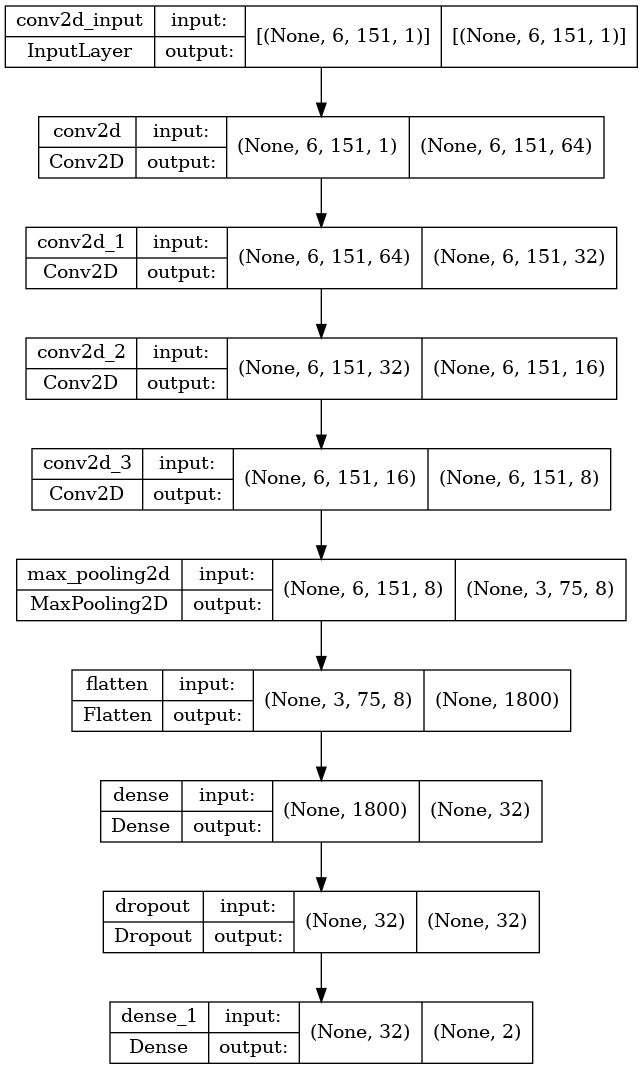

In [12]:
# #### plotting model
plot_model(model,show_shapes = True, to_file='model .png')

In [14]:
#### train the model

#compile model using accuracy to measure model performance
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)
# class_weight = {0: 5,
#                 1: 95
#                }

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)
#                     , class_weight=class_weight)
# history = model.fit(X_train, y_train, epochs=1)


Epoch 1/2
   2/7233 [..............................] - ETA: 8:45 - loss: nan - categorical_accuracy: 0.2344

2022-03-08 21:18:21.631375: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 838713192 exceeds 10% of free system memory.


 198/7233 [..............................] - ETA: 8:40 - loss: nan - categorical_accuracy: 0.2857

KeyboardInterrupt: 

In [ ]:
### Saveing the Model
model.save_weights('cnn_2_epoch.h5')


In [ ]:
predit = model.predict(X_test)
#actual results for first 4 images in test set
print(predit[:4])


In [ ]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,1], predit[:,1])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,1], predit[:,1])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val)

In [ ]:
history.history

In [ ]:

# Plot training & validation accuracy values
plt.plot(list(range(1,5)),history.history['categorical_accuracy'])
plt.plot(list(range(1,5)),history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(list(range(1,5)),history.history['loss'])
plt.plot(list(range(1,5)),history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# # predit
# predit[:,0].shape 

In [ ]:
predicts = []
for a,b in predit:
    if a >=b:
        predicts.append(0)
    else:
        predicts.append(1)
len(predicts)

In [ ]:
# predicts1 = []
# e = d = z = 0

# for a,b in predit:
#     if a >=0.90:
#         predicts1.append(0)
#         d += 1
#     elif b>=0.95:
#         predicts1.append(2)
#         e += 1
#     elif a<=0.05 and b<=0.1:
#         predicts1.append(1)
#         z += 1
# print('degrassive', d, 'enhancive', e, 'zeros', z)
# print("""
# Epoch04: degrassive 224 enhancive 2939 zeros 40
# Epoch05: degrassive 280 enhancive 2823 zeros 39
# Epoch06: degrassive 233 enhancive 2879 zeros 79
# Epoch07: degrassive 203 enhancive 2926 zeros 134
# Epoch08: degrassive 224 enhancive 2895 zeros 180
# Epoch09: degrassive 191 enhancive 2856 zeros 191
# Epoch10: degrassive 189 enhancive 2821 zeros 246
# Epoch11: degrassive 164 enhancive 2581 zeros 235
# Epoch12: degrassive 166 enhancive 2454 zeros 266
# """)

In [ ]:
# max(list((dataTest.values[:,2]+1)/2))

In [ ]:

cm = confusion_matrix(list(predicts), list((dataTest.values[:,2])))
print(cm)

CR = classification_report(list((dataTest.values[:,2])),list(predicts))
print(CR)
# print(145/4702)
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2])), list(predicts))


In [ ]:
print(pd.DataFrame(predit))

In [ ]:
pd.DataFrame(predit).plot.density()


In [ ]:
pd.DataFrame(predit).iloc[:,0].plot.density()

In [ ]:
pd.DataFrame(predit).iloc[:,1].plot.density()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Interaction drugs Probability')
plt.ylabel('frequency distribution')


In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('None Interaction drugs Probability')
plt.ylabel('frequency distribution')

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('all drugs Probability')
plt.ylabel('frequency distribution')